In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv('../data/ph_fires_matched_2.1.csv')

In [2]:
df['building_fires'] = df[[x for x in df.columns if 'building_fires' in x]].sum(axis=1)
df['severe_fires'] = df[[x for x in df.columns if 'inc_type_111_' in x]].sum(axis=1)

df['fires_per_unit'] = df.apply(lambda x: x.building_fires / x.total_dwelling_units if x.total_dwelling_units > 0 else 0, axis=1)

In [61]:
df['full_address'] = df.apply(lambda x: x['corrected_address'].title() + '\n' + x.std_city.title() + ', ' + x.std_st, axis=1)


In [78]:
df[df.std_city == 'PHILADELPHIA'].sort_values('total_dwelling_units', ascending=False)[[x for x in df.columns if 'severe_fires' in x or 'total_dwelling_units' == x]].head(25)

,total_dwelling_units,severe_fires
94429,155,2.0
59,133,0.0
15222,109,0.0
11199,108,5.0
119416,108,0.0
52124,102,7.0
70173,102,4.0
171689,98,3.0
115766,80,0.0
39855,72,0.0


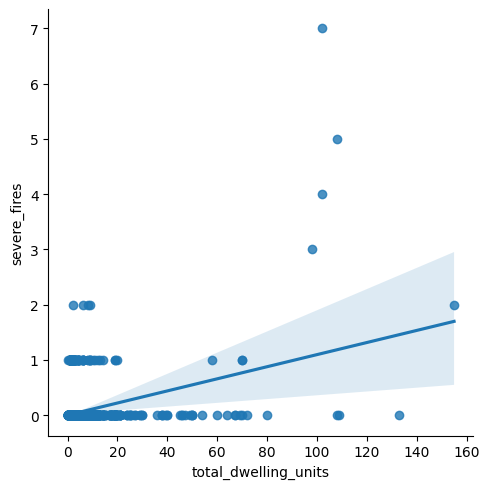

In [76]:
sns.lmplot(data=df[df.std_city == 'PHILADELPHIA'], x='total_dwelling_units', y='severe_fires')

In [131]:
conn = sqlite3.Connection('../data/fire_data.db')

church = pd.read_sql_query("""
    select * 
    from incident_address
    where lower(city) like '%spartan%' 
        and NUM_MILE = 764
""", conn)
church

,INCIDENT_KEY,STATE,FDID,INC_DATE,INC_NO,EXP_NO,LOC_TYPE,NUM_MILE,STREET_PRE,STREETNAME,STREETTYPE,STREETSUF,APT_NO,CITY,STATE_ID,ZIP5,ZIP4,X_STREET,address,INC_YEAR
0,SC_42130_01172021_123_0,SC,42130,1172021,123,0,1,764,N,CHURCH,ST,None,None,SPARTANBURG,SC,29303,NaN,W CENTENNIAL ST ATHENS CT,764 N CHURCH ST,2021
1,SC_42130_07292021_1677_0,SC,42130,7292021,1677,0,1,764,N,CHURCH,ST,None,None,SPARTANBURG,SC,29301,NaN,W CENTENNIAL ST ATHENS CT,764 N CHURCH ST,2021
2,SC_42130_08072021_1745_0,SC,42130,8072021,1745,0,1,764,N,CHURCH,ST,None,None,SPARTANBURG,SC,29303,NaN,W CENTENNIAL ST ATHENS CT,764 N CHURCH ST,2021
3,SC_42212_01172021_28_0,SC,42212,1172021,28,0,1,764,N,CHURCH,ST,None,None,SPARTANBURG,SC,29303,NaN,W CENTENNIAL ST ATHENS CT,764 N CHURCH ST,2021
4,SC_42212_08072021_379_0,SC,42212,8072021,379,0,1,764,N,CHURCH,ST,None,None,SPARTANBURG,SC,29301,NaN,W CENTENNIAL ST ATHENS CT,764 N CHURCH ST,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,SC_42216_4262012_205_0,SC,42216,4262012,205,0,1,764,N,CHURCH,ST,None,None,SPARTANBURGCOUNTY,SC,29303,NaN,None,764 N CHURCH ST,2012
119,SC_42216_7052012_324_0,SC,42216,7052012,324,0,1,764,N,church,ST,None,None,SPARTANBURGCOUNTY,SC,29303,NaN,None,764 N CHURCH ST,2012
120,SC_42232_3272012_2120369_0,SC,42232,3272012,2120369,0,1,764,N,CHURCH,ST,None,None,SPARTANBURG,SC,29301,NaN,W CENTENNIAL STREET,764 N CHURCH ST,2012
121,SC_42235_4262012_258_0,SC,42235,4262012,258,0,1,764,N,Church,ST,None,None,SPARTANBURG,SC,29301,NaN,None,764 N CHURCH ST,2012


In [141]:
church.INCIDENT_KEY.values

array(['SC_42130_01172021_123_0', 'SC_42130_07292021_1677_0',
       'SC_42130_08072021_1745_0', 'SC_42212_01172021_28_0',
       'SC_42212_08072021_379_0', 'SC_42216_01172021_43_0',
       'SC_42216_02092021_101_0', 'SC_42216_03072021_182_0',
       'SC_42216_08072021_720_0', 'SC_42235_01172021_41_0',
       'SC_42235_08072021_466_0', 'SC_42324_08072021_036930_0',
       'SC_42130_11232020_2589_0', 'SC_42216_01072020_24_0',
       'SC_42216_09062020_630_0', 'SC_42216_11142020_816_0',
       'SC_42229_11142020_27942_0', 'SC_42324_11142020_051296_0',
       'SC_42130_02052019_243_0', 'SC_42130_07302019_1539_0',
       'SC_42130_09252019_2009_0', 'SC_42130_10162019_2183_0',
       'SC_42212_02052019_49_0', 'SC_42212_07162019_284_0',
       'SC_42212_07302019_308_0', 'SC_42212_08032019_318_0',
       'SC_42212_09022019_376_0', 'SC_42212_10162019_444_0',
       'SC_42216_02052019_107_0', 'SC_42216_07012019_534_0',
       'SC_42216_07072019_556_0', 'SC_42216_07162019_587_0',
       'SC_4221

In [142]:
bi = pd.read_sql_query("""
select * from basic_incident where INCIDENT_KEY IN (
'SC_42130_01172021_123_0', 'SC_42130_07292021_1677_0',
       'SC_42130_08072021_1745_0', 'SC_42212_01172021_28_0',
       'SC_42212_08072021_379_0', 'SC_42216_01172021_43_0',
       'SC_42216_02092021_101_0', 'SC_42216_03072021_182_0',
       'SC_42216_08072021_720_0', 'SC_42235_01172021_41_0',
       'SC_42235_08072021_466_0', 'SC_42324_08072021_036930_0',
       'SC_42130_11232020_2589_0', 'SC_42216_01072020_24_0',
       'SC_42216_09062020_630_0', 'SC_42216_11142020_816_0',
       'SC_42229_11142020_27942_0', 'SC_42324_11142020_051296_0',
       'SC_42130_02052019_243_0', 'SC_42130_07302019_1539_0',
       'SC_42130_09252019_2009_0', 'SC_42130_10162019_2183_0',
       'SC_42212_02052019_49_0', 'SC_42212_07162019_284_0',
       'SC_42212_07302019_308_0', 'SC_42212_08032019_318_0',
       'SC_42212_09022019_376_0', 'SC_42212_10162019_444_0',
       'SC_42216_02052019_107_0', 'SC_42216_07012019_534_0',
       'SC_42216_07072019_556_0', 'SC_42216_07162019_587_0',
       'SC_42216_07302019_614_0', 'SC_42216_08032019_622_0',
       'SC_42216_09022019_711_0', 'SC_42216_10162019_843_0',
       'SC_42216_11242019_970_0', 'SC_42229_10162019_769_0',
       'SC_42235_07162019_475_0', 'SC_42235_07302019_513_0',
       'SC_42235_09022019_602_0', 'SC_42235_10162019_701_0',
       'SC_42310_02052019_76_0', 'SC_42310_07302019_558_0',
       'SC_42310_09022019_659_0', 'SC_42310_10162019_792_0',
       'SC_42310_11242019_893_0', 'SC_42130_6242018_1381_0',
       'SC_42212_10302018_500_0', 'SC_42216_2242018_176_0',
       'SC_42216_6242018_515_0', 'SC_42235_2242018_139_0',
       'SC_42235_4102018_250_0', 'SC_42235_6242018_442_0',
       'SC_42235_10302018_791_0', 'SC_42310_6242018_447_0',
       'SC_42130_1302017_0000190_0', 'SC_42130_2182017_0000308_0',
       'SC_42130_6172017_1176_0', 'SC_42130_7242017_1438_0',
       'SC_42130_9282017_1995_0', 'SC_42130_11122017_2699_0',
       'SC_42212_1072017_8_0', 'SC_42212_1302017_42_0',
       'SC_42212_6172017_215_0', 'SC_42212_7242017_273_0',
       'SC_42216_1072017_14_0', 'SC_42216_1302017_59_0',
       'SC_42216_3102017_163_0', 'SC_42216_6172017_424_0',
       'SC_42216_6202017_431_0', 'SC_42216_7242017_529_0',
       'SC_42216_8112017_590_0', 'SC_42216_11182017_893_0',
       'SC_42232_2142017_2170226_0', 'SC_42235_1072017_22_0',
       'SC_42235_1302017_72_0', 'SC_42235_6172017_328_0',
       'SC_42235_9282017_528_0', 'SC_42235_11122017_634_0',
       'SC_42310_1302017_100059_0', 'SC_42235_7232016_474_0',
       'SC_42130_6212015_0001070_0', 'SC_42130_9302015_0001747_0',
       'SC_42216_6212015_367_0', 'SC_42216_9302015_604_0',
       'SC_42235_9302015_760_0', 'SC_42130_1072014_0000059_0',
       'SC_42130_1252014_0000194_0', 'SC_42130_5042014_0000756_0',
       'SC_42216_1072014_13_0', 'SC_42216_1252014_56_0',
       'SC_42216_5042014_259_0', 'SC_42130_4222013_0000661_0',
       'SC_42130_4282013_0000694_0', 'SC_42130_5192013_0000813_0',
       'SC_42130_5232013_0000842_0', 'SC_42130_6282013_0001066_0',
       'SC_42130_9252013_0001646_0', 'SC_42212_4282013_164_0',
       'SC_42216_4222013_165_0', 'SC_42216_4282013_178_0',
       'SC_42216_5232013_232_0', 'SC_42232_4282013_2130454_0',
       'SC_42234_4282013_00680_0', 'SC_42130_3272012_1200441_0',
       'SC_42130_3282012_1200448_0', 'SC_42130_4022012_1200478_0',
       'SC_42130_4152012_1200564_0', 'SC_42130_4192012_1200581_0',
       'SC_42130_4262012_1200615_0', 'SC_42130_9202012_1201520_0',
       'SC_42216_2212012_88_0', 'SC_42216_3272012_153_0',
       'SC_42216_3282012_155_0', 'SC_42216_4022012_165_0',
       'SC_42216_4152012_189_0', 'SC_42216_4192012_196_0',
       'SC_42216_4262012_205_0', 'SC_42216_7052012_324_0',
       'SC_42232_3272012_2120369_0', 'SC_42235_4262012_258_0',
       'SC_42324_2212012_250_0')
""", conn)
bi

,INCIDENT_KEY,STATE,FDID,INC_DATE,INC_NO,EXP_NO,VERSION,DEPT_STA,INC_TYPE,ADD_WILD,AID,ALARM,ARRIVAL,INC_CONT,LU_CLEAR,SHIFT,ALARMS,DISTRICT,ACT_TAK1,ACT_TAK2,ACT_TAK3,APP_MOD,SUP_APP,EMS_APP,OTH_APP,SUP_PER,EMS_PER,OTH_PER,RESOU_AID,PROP_LOSS,CONT_LOSS,PROP_VAL,CONT_VAL,FF_DEATH,OTH_DEATH,FF_INJ,OTH_INJ,DET_ALERT,HAZ_REL,MIXED_USE,PROP_USE,CENSUS
0,SC_42130_01172021_123_0,SC,42130,1172021,123,0,5.0,ST2,113,N,2,11720211348,11720211351,None,1.172021e+10,None,NaN,None,86.0,64.0,NaN,Y,5,0,2,15,0,3,N,5000.0,5000.0,10000000.0,100000.0,0.0,None,0.0,None,U,N,None,429.0,NaN
1,SC_42130_02052019_243_0,SC,42130,2052019,243,0,5.0,ST1,113,N,2,20520191611,20520191617,None,2.052019e+10,None,NaN,None,87.0,51.0,NaN,Y,4,0,3,13,0,4,N,0.0,0.0,0.0,0.0,0.0,None,0.0,None,U,N,None,429.0,NaN
2,SC_42130_07292021_1677_0,SC,42130,7292021,1677,0,5.0,ST3,411,N,N,72920211950,72920211954,None,7.292021e+10,None,NaN,None,86.0,43.0,NaN,Y,1,0,0,4,0,0,N,0.0,0.0,0.0,0.0,0.0,None,0.0,None,U,3,None,429.0,NaN
3,SC_42130_07302019_1539_0,SC,42130,7302019,1539,0,5.0,ST2,111,N,2,73020190818,73020190822,None,7.302019e+10,None,NaN,None,10.0,NaN,NaN,Y,5,0,3,18,0,5,N,1000.0,500.0,200000.0,50000.0,0.0,None,0.0,None,1,N,None,429.0,NaN
4,SC_42130_08072021_1745_0,SC,42130,8072021,1745,0,5.0,ST1,113,N,2,80720211504,80720211510,None,8.072021e+10,None,NaN,None,86.0,45.0,51.0,Y,5,0,3,17,0,5,N,0.0,200.0,0.0,1500.0,0.0,None,0.0,None,U,N,None,429.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,SC_42310_1302017_100059_0,SC,42310,1302017,100059,0,5.0,10,111,N,4,13020171951,13020172000,None,1.302017e+10,None,NaN,None,12.0,NaN,NaN,Y,1,0,0,4,0,0,N,0.0,0.0,0.0,0.0,0.0,None,0.0,None,U,N,None,429.0,NaN
119,SC_42310_6242018_447_0,SC,42310,6242018,447,0,5.0,10,111,N,4,62420181732,62420181742,None,6.242018e+10,None,NaN,None,92.0,NaN,NaN,Y,1,0,0,3,0,0,N,0.0,0.0,0.0,0.0,0.0,None,0.0,None,U,N,None,NaN,NaN
120,SC_42324_08072021_036930_0,SC,42324,8072021,36930,0,5.0,1,111,N,4,80720211504,80720211515,None,8.072021e+10,None,NaN,None,70.0,NaN,NaN,Y,0,0,1,0,0,1,N,0.0,0.0,0.0,0.0,0.0,None,0.0,None,U,N,None,429.0,NaN
121,SC_42324_11142020_051296_0,SC,42324,11142020,51296,0,5.0,1,111,N,4,111420201300,111420201309.0,None,1.114202e+11,None,NaN,None,92.0,NaN,NaN,Y,0,0,1,0,0,1,N,0.0,0.0,0.0,0.0,0.0,None,0.0,None,U,N,None,NaN,NaN


https://www.wspa.com/news/local-news/crews-respond-to-fire-at-spartanburg-apartment-complex/

^ Spartanburg

In [154]:
pd.set_option('display.max_rows', 10)
bi['year'] = bi.INC_DATE.apply(lambda x: int(str(x)[-4:]))
display(bi.sort_values('year'))
pd.set_option('display.max_rows', 10)

,INCIDENT_KEY,STATE,FDID,INC_DATE,INC_NO,EXP_NO,VERSION,DEPT_STA,INC_TYPE,ADD_WILD,AID,ALARM,ARRIVAL,INC_CONT,LU_CLEAR,SHIFT,ALARMS,DISTRICT,ACT_TAK1,ACT_TAK2,ACT_TAK3,APP_MOD,SUP_APP,EMS_APP,OTH_APP,SUP_PER,EMS_PER,OTH_PER,RESOU_AID,PROP_LOSS,CONT_LOSS,PROP_VAL,CONT_VAL,FF_DEATH,OTH_DEATH,FF_INJ,OTH_INJ,DET_ALERT,HAZ_REL,MIXED_USE,PROP_USE,CENSUS,year
122,SC_42324_2212012_250_0,SC,42324,2212012,250,0,5.0,1,111,N,3,22120121800,22120121824.0,None,2.212012e+10,None,NaN,None,73.0,NaN,NaN,Y,1,1,1,4,0,1,N,0.0,0.0,0.0,0.0,0.0,None,0.0,None,U,N,None,429.0,NaN,2012
29,SC_42130_9202012_1201520_0,SC,42130,9202012,1201520,0,5.0,3,113,N,N,92020121208,92020121216.0,None,9.202012e+10,A,1.0,31,51.0,81.0,NaN,Y,3,3,2,10,0,2,N,0.0,0.0,NaN,NaN,0.0,None,0.0,None,1,None,NN,429.0,20301.0,2012
68,SC_42216_2212012_88_0,SC,42216,2212012,88,0,5.0,1,111,N,4,22120121800,22120121805.0,None,2.212012e+10,None,NaN,None,73.0,NaN,NaN,Y,2,2,1,4,0,1,N,0.0,0.0,0.0,0.0,0.0,None,0.0,None,U,N,None,429.0,NaN,2012
71,SC_42216_3272012_153_0,SC,42216,3272012,153,0,5.0,1,118,N,4,32720121821,32720121831.0,None,3.272012e+10,None,NaN,None,73.0,NaN,NaN,N,0,0,0,0,0,0,N,0.0,0.0,0.0,0.0,0.0,None,0.0,None,U,N,None,429.0,NaN,2012
72,SC_42216_3282012_155_0,SC,42216,3282012,155,0,5.0,1,117,N,4,32820121719,32820121724.0,None,3.282012e+10,None,NaN,None,73.0,75.0,NaN,Y,2,2,0,7,0,0,N,0.0,0.0,0.0,0.0,0.0,None,0.0,None,U,N,None,NaN,NaN,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,SC_42216_02092021_101_0,SC,42216,2092021,101,0,5.0,15,111,N,4,20920210135,20920210140,None,2.092021e+10,None,NaN,None,73.0,NaN,NaN,Y,1,0,1,4,0,1,N,0.0,0.0,0.0,0.0,0.0,None,0.0,None,U,N,None,NaN,NaN,2021
48,SC_42216_01172021_43_0,SC,42216,1172021,43,0,5.0,15,111,N,4,11720211348,11720211355,None,1.172021e+10,None,NaN,None,12.0,73.0,75.0,Y,1,0,0,3,0,0,N,0.0,0.0,0.0,0.0,0.0,None,0.0,None,U,N,None,NaN,NaN,2021
38,SC_42212_08072021_379_0,SC,42212,8072021,379,0,5.0,12,111,N,4,80720211504,80720211518,None,8.072021e+10,None,NaN,None,92.0,NaN,NaN,Y,1,0,0,2,0,0,N,0.0,0.0,0.0,0.0,0.0,None,0.0,None,U,N,None,NaN,NaN,2021
98,SC_42235_08072021_466_0,SC,42235,8072021,466,0,5.0,1,113,N,4,80720211504,80720211513,None,8.072021e+10,None,NaN,None,92.0,NaN,NaN,Y,1,0,0,2,0,0,N,0.0,0.0,0.0,0.0,0.0,None,0.0,None,U,N,None,NaN,NaN,2021


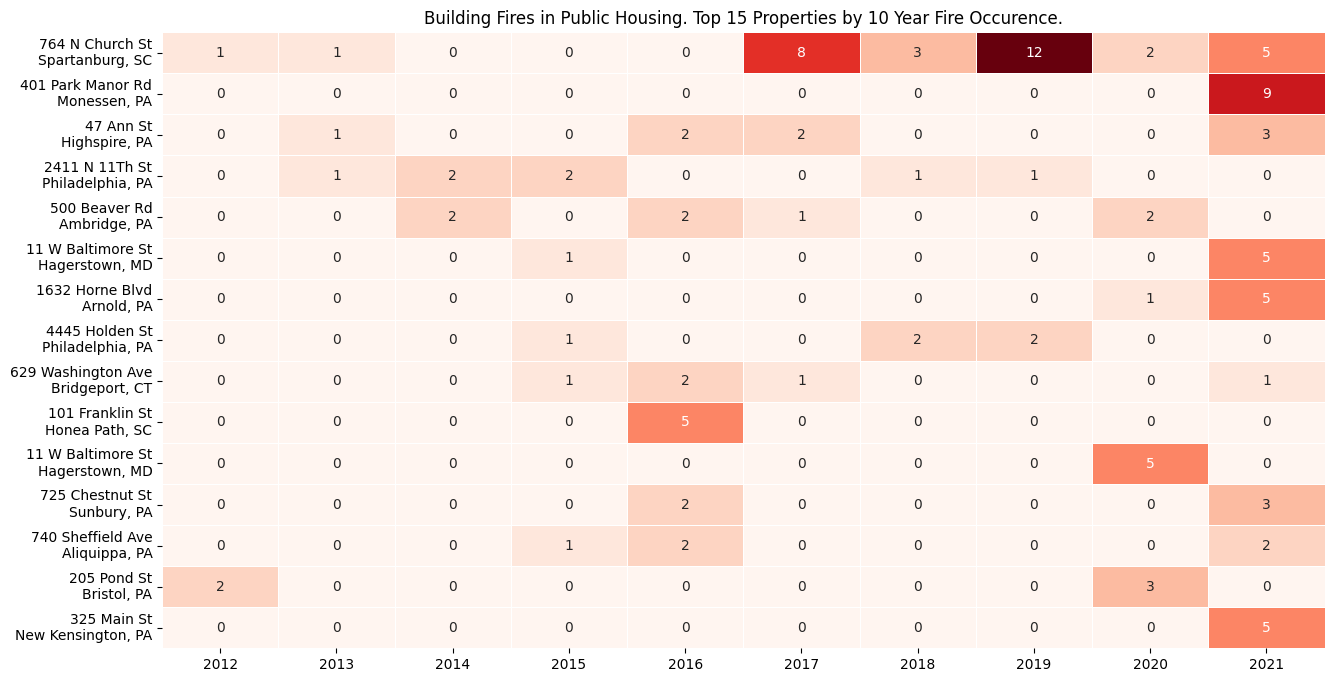

In [151]:
pdf = df.copy()

TOPN = 15
pdf = pdf.set_index('full_address')
pdf = pdf.sort_values('severe_fires', ascending=False)[[x for x in pdf.columns if 'inc_type_111_' in x]].head(TOPN)

custom_labels = [
    year
    for year in range(2012, 2022)
]

plt.figure(figsize=(15, 8))
ax = sns.heatmap(pdf, cmap='Reds', annot=True, fmt=".0f", linewidths=.5, cbar=False)
ax.set_title(f'Building Fires in Public Housing. Top {TOPN} Properties by 10 Year Fire Occurence.')
ax.set_xlabel(None)
ax.set_ylabel(None)

ax.set_xticklabels(custom_labels, rotation=0)  

plt.show()


In [2]:
buildings = pd.read_csv('../data/Public_Housing_Buildings.csv')

C:\Users\jackv\AppData\Local\Temp\ipykernel_8572\479678967.py:1: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  buildings = pd.read_csv('../data/Public_Housing_Buildings.csv')


In [3]:
df.head(1)

,objectid,corrected_address,corrected_unit,std_city,std_st,std_zip5,total_dwelling_units,acc_units,total_occupied,regular_vacant,total_units,pct_occupied,number_reported,pct_reported,months_since_report,pct_movein,people_per_unit,people_total,rent_per_month,spending_per_month,spending_per_month_prev_yr,hh_income,person_income,pct_lt5k,pct_5k_lt10k,pct_10k_lt15k,pct_15k_lt20k,pct_ge20k,pct_wage_major,pct_welfare_major,pct_other_major,pct_median,pct_lt50_median,pct_lt30_median,pct_2adults,pct_1adult,pct_female_head,pct_female_head_child,pct_disabled_lt62,pct_disabled_ge62,pct_disabled_all,pct_lt24_head,pct_age25_50,pct_age51_61,pct_age62plus,pct_age85plus,pct_minority,pct_black,pct_native_american,pct_asian,pct_hispanic,months_waiting,months_from_movein,pct_utility_allow,ave_util_allow,pct_bed1,pct_bed2,pct_bed3,pct_overhoused,tminority,tpoverty,tpct_ownsfd,chldrn_mbr_cnt,eldly_prcnt,pct_disabled_lt62_all,pct_lt80_median,median_inc_amnt,metro,micro,c1pprb,annl_expns_amnt,annl_expns_amnt_prev_yr,pha_total_units,dev_spending_per_month_prev_yr,dev_chldrn_mbr_cnt,dev_annl_expns_amnt,dev_annl_expns_amnt_prev_yr,dev_eldly_prcnt,dev_pct_disabled_lt62_all,dev_pct_lt80_median,dev_median_inc_amnt,dev_total_units,dev_total_dwelling_units,dev_acc_units,dev_total_occupied,dev_regular_vacant,dev_pha_total_units,dev_pct_occupied,dev_number_reported,dev_pct_reported,dev_months_since_report,dev_pct_movein,dev_people_per_unit,dev_people_total,dev_rent_per_month,dev_spending_per_month,dev_hh_income,dev_person_income,dev_pct_lt5k,dev_pct_5k_lt10k,dev_pct_10k_lt15k,dev_pct_15k_lt20k,dev_pct_ge20k,dev_pct_wage_major,dev_pct_welfare_major,dev_pct_other_major,dev_pct_median,dev_pct_lt50_median,dev_pct_lt30_median,dev_pct_2adults,dev_pct_1adult,dev_pct_female_head,dev_pct_female_head_child,dev_pct_disabled_lt62,dev_pct_disabled_ge62,dev_pct_disabled_all,dev_pct_lt24_head,dev_pct_age25_50,dev_pct_age51_61,dev_pct_age62plus,dev_pct_age85plus,dev_pct_minority,dev_pct_black,dev_pct_native_american,dev_pct_asian,dev_pct_hispanic,dev_months_waiting,dev_months_from_movein,dev_pct_utility_allow,dev_ave_util_allow,dev_pct_bed1,dev_pct_bed2,dev_pct_bed3,dev_pct_overhoused,dev_tminority,dev_tpoverty,dev_tpct_ownsfd,pha_section8_units_cnt,pha_section8_occupied,pha_opfund_amnt,pha_opfund_amnt_prev_yr,pha_capfund_amnt,pha_capfund_amnt_prev_yr,pha_ross_amnt,pha_fss_amnt,pha_chldrn_mbr_cnt,pha_eldly_prcnt,pha_pct_disabled_lt62_all,pha_pct_lt80_median,pha_median_inc_amnt,pha_annl_expns_amnt,pha_annl_expns_amnt_prev_yr,construction_year,dofa_actual_year,encoded_development_code,encoded_participant_code,encoded_msa_nm,encoded_zip5,encoded_zip9,encoded_zip11,msgusps_100% overall probable correctness,msgusps_20% overall probable correctness,msgusps_30% overall probable correctness,msgusps_40% overall probable correctness,msgusps_50% overall probable correctness,msgusps_60% overall probable correctness,msgusps_70% overall probable correctness,msgusps_80% overall probable correctness,msgusps_90% overall probable correctness,msgusps_apartment missing or not found,msgusps_house # not found on this street,msgusps_insufficient or blank address,msgusps_multiple match,msgusps_street not found,"pha_ha_section_8_size_category_extra large (5,000+)","pha_ha_section_8_size_category_large (1,000-4,999)",pha_ha_section_8_size_category_medium high (300-999),pha_ha_section_8_size_category_medium low (100-299),pha_ha_section_8_size_category_small (50-99),pha_ha_section_8_size_category_very small (0-49),building_type_code_es,building_type_code_nds,building_type_code_rw,building_type_code_sd,building_type_code_sf,building_type_code_wu,addr_type_f,addr_type_g,addr_type_h,addr_type_missing_value,addr_type_p,addr_type_r,addr_type_s,building_status_type_code_ddaprd,building_status_type_code_dddrft,building_status_type_code_ddprop,building_status_type_code_inapcp,building_status_type_code_rmi,building_status_type_code_rmiprp,"pha_ha_combined_size_category_extra large (5,000+)","pha_ha_combined_size

In [4]:
df.total_dwelling_units.sort_values()

143656      0
27996       0
17054       0
17645       0
95973       0
         ... 
173058    407
25984     418
11087     418
36415     418
57297     477
Name: total_dwelling_units, Length: 179043, dtype: int64

In [6]:
p = df[df.std_city == 'PHILADELPHIA'].copy().reset_index(drop=True)

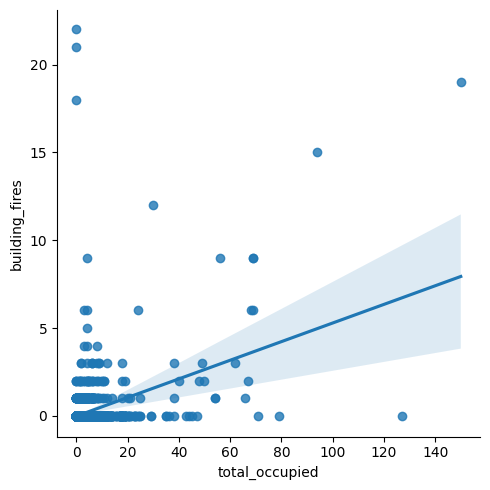

In [7]:
fig = sns.lmplot(data=p, y='building_fires', x='total_occupied')


In [9]:
p = p.merge(buildings.loc[:, ['OBJECTID', 'LAT', 'LON']], left_on='objectid', right_on='OBJECTID')
p = p[p.LON > -84]

In [10]:
ped = p[p.building_fires > 0]

In [11]:
pd.set_option('display.max_rows', None)
print(
)
pd.set_option('display.max_rows', 20)


In [12]:
p.regular_vacant.isna().sum()             

0

In [13]:
p.dev_eldly_prcnt.nunique()

75

In [175]:
p.iloc[1304]

objectid                      25637
corrected_address    2411 N 11TH ST
corrected_unit                  NaN
std_city               PHILADELPHIA
std_st                           PA
                          ...      
building_fires                 22.0
fires_per_unit             0.215686
OBJECTID                      25637
LAT                       39.988739
LON                      -75.150019
Name: 1317, Length: 555, dtype: object

In [135]:
ped = p[p.columns[(p.isna().sum() < 100)]]
c = ped.select_dtypes(include='number').corr().fires_per_unit.dropna().sort_values()
pd.set_option('display.max_rows', 150)
# c[-150 :]
c[: 150]

dev_pct_ge20k                    -0.038329
dev_pct_female_head              -0.036515
dev_pct_median                   -0.032404
dev_median_inc_amnt              -0.030942
dev_pct_wage_major               -0.030132
pct_occupied                     -0.029522
dev_pct_occupied                 -0.029329
dev_hh_income                    -0.027504
LAT                              -0.025704
c1pprb                           -0.024773
dev_pct_disabled_lt62_all        -0.022724
dev_months_from_movein           -0.022116
dev_rent_per_month               -0.021890
dev_pct_minority                 -0.019490
dev_pct_1adult                   -0.018918
dev_pct_age25_50                 -0.018480
dev_months_since_report          -0.018201
dev_pct_female_head_child        -0.017583
dev_pct_bed2                     -0.014607
dev_pct_overhoused               -0.013401
dev_pct_utility_allow            -0.013345
dev_tminority                    -0.012958
dev_tpct_ownsfd                  -0.011499
dev_pct_bed

In [128]:
p.total_dwelling_units  .nunique()

52

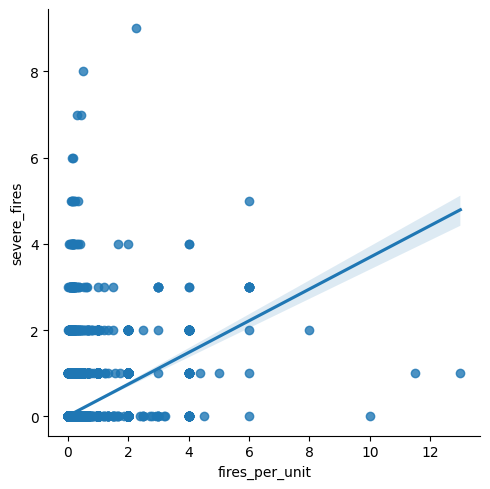

In [35]:
sns.lmplot(data=df[df.severe_fires < 20], x='fires_per_unit', y='severe_fires')

In [59]:
df.sort_values('building_fires').tail(15).loc[:, ['building_fires', 'severe_fires', 'total_dwelling_units']]

,building_fires,severe_fires,total_dwelling_units
123193,104.0,1.0,198
51860,104.0,32.0,150
13188,106.0,2.0,129
71700,112.0,2.0,318
98958,112.0,2.0,120
23552,118.0,0.0,99
178538,126.0,0.0,100
7804,136.0,1.0,179
35721,140.0,0.0,48
42802,154.0,2.0,251


<Axes: xlabel='dev_eldly_prcnt', ylabel='dev_pct_disabled_all'>

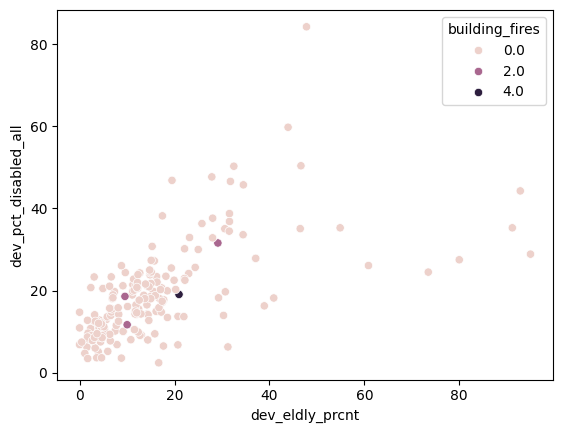

In [58]:
import numpy as np

sns.scatterplot(data=df.sample(200), x='dev_eldly_prcnt', y='dev_pct_disabled_all', hue='building_fires')

# sns.scatterplot(data=p, x='dev_eldly_prcnt', y='dev_pct_overhoused', hue='building_fires')

# sns.scatterplot(data=p, x='dev_pct_disabled_all', y='dev_pct_overhoused', hue='building_fires')



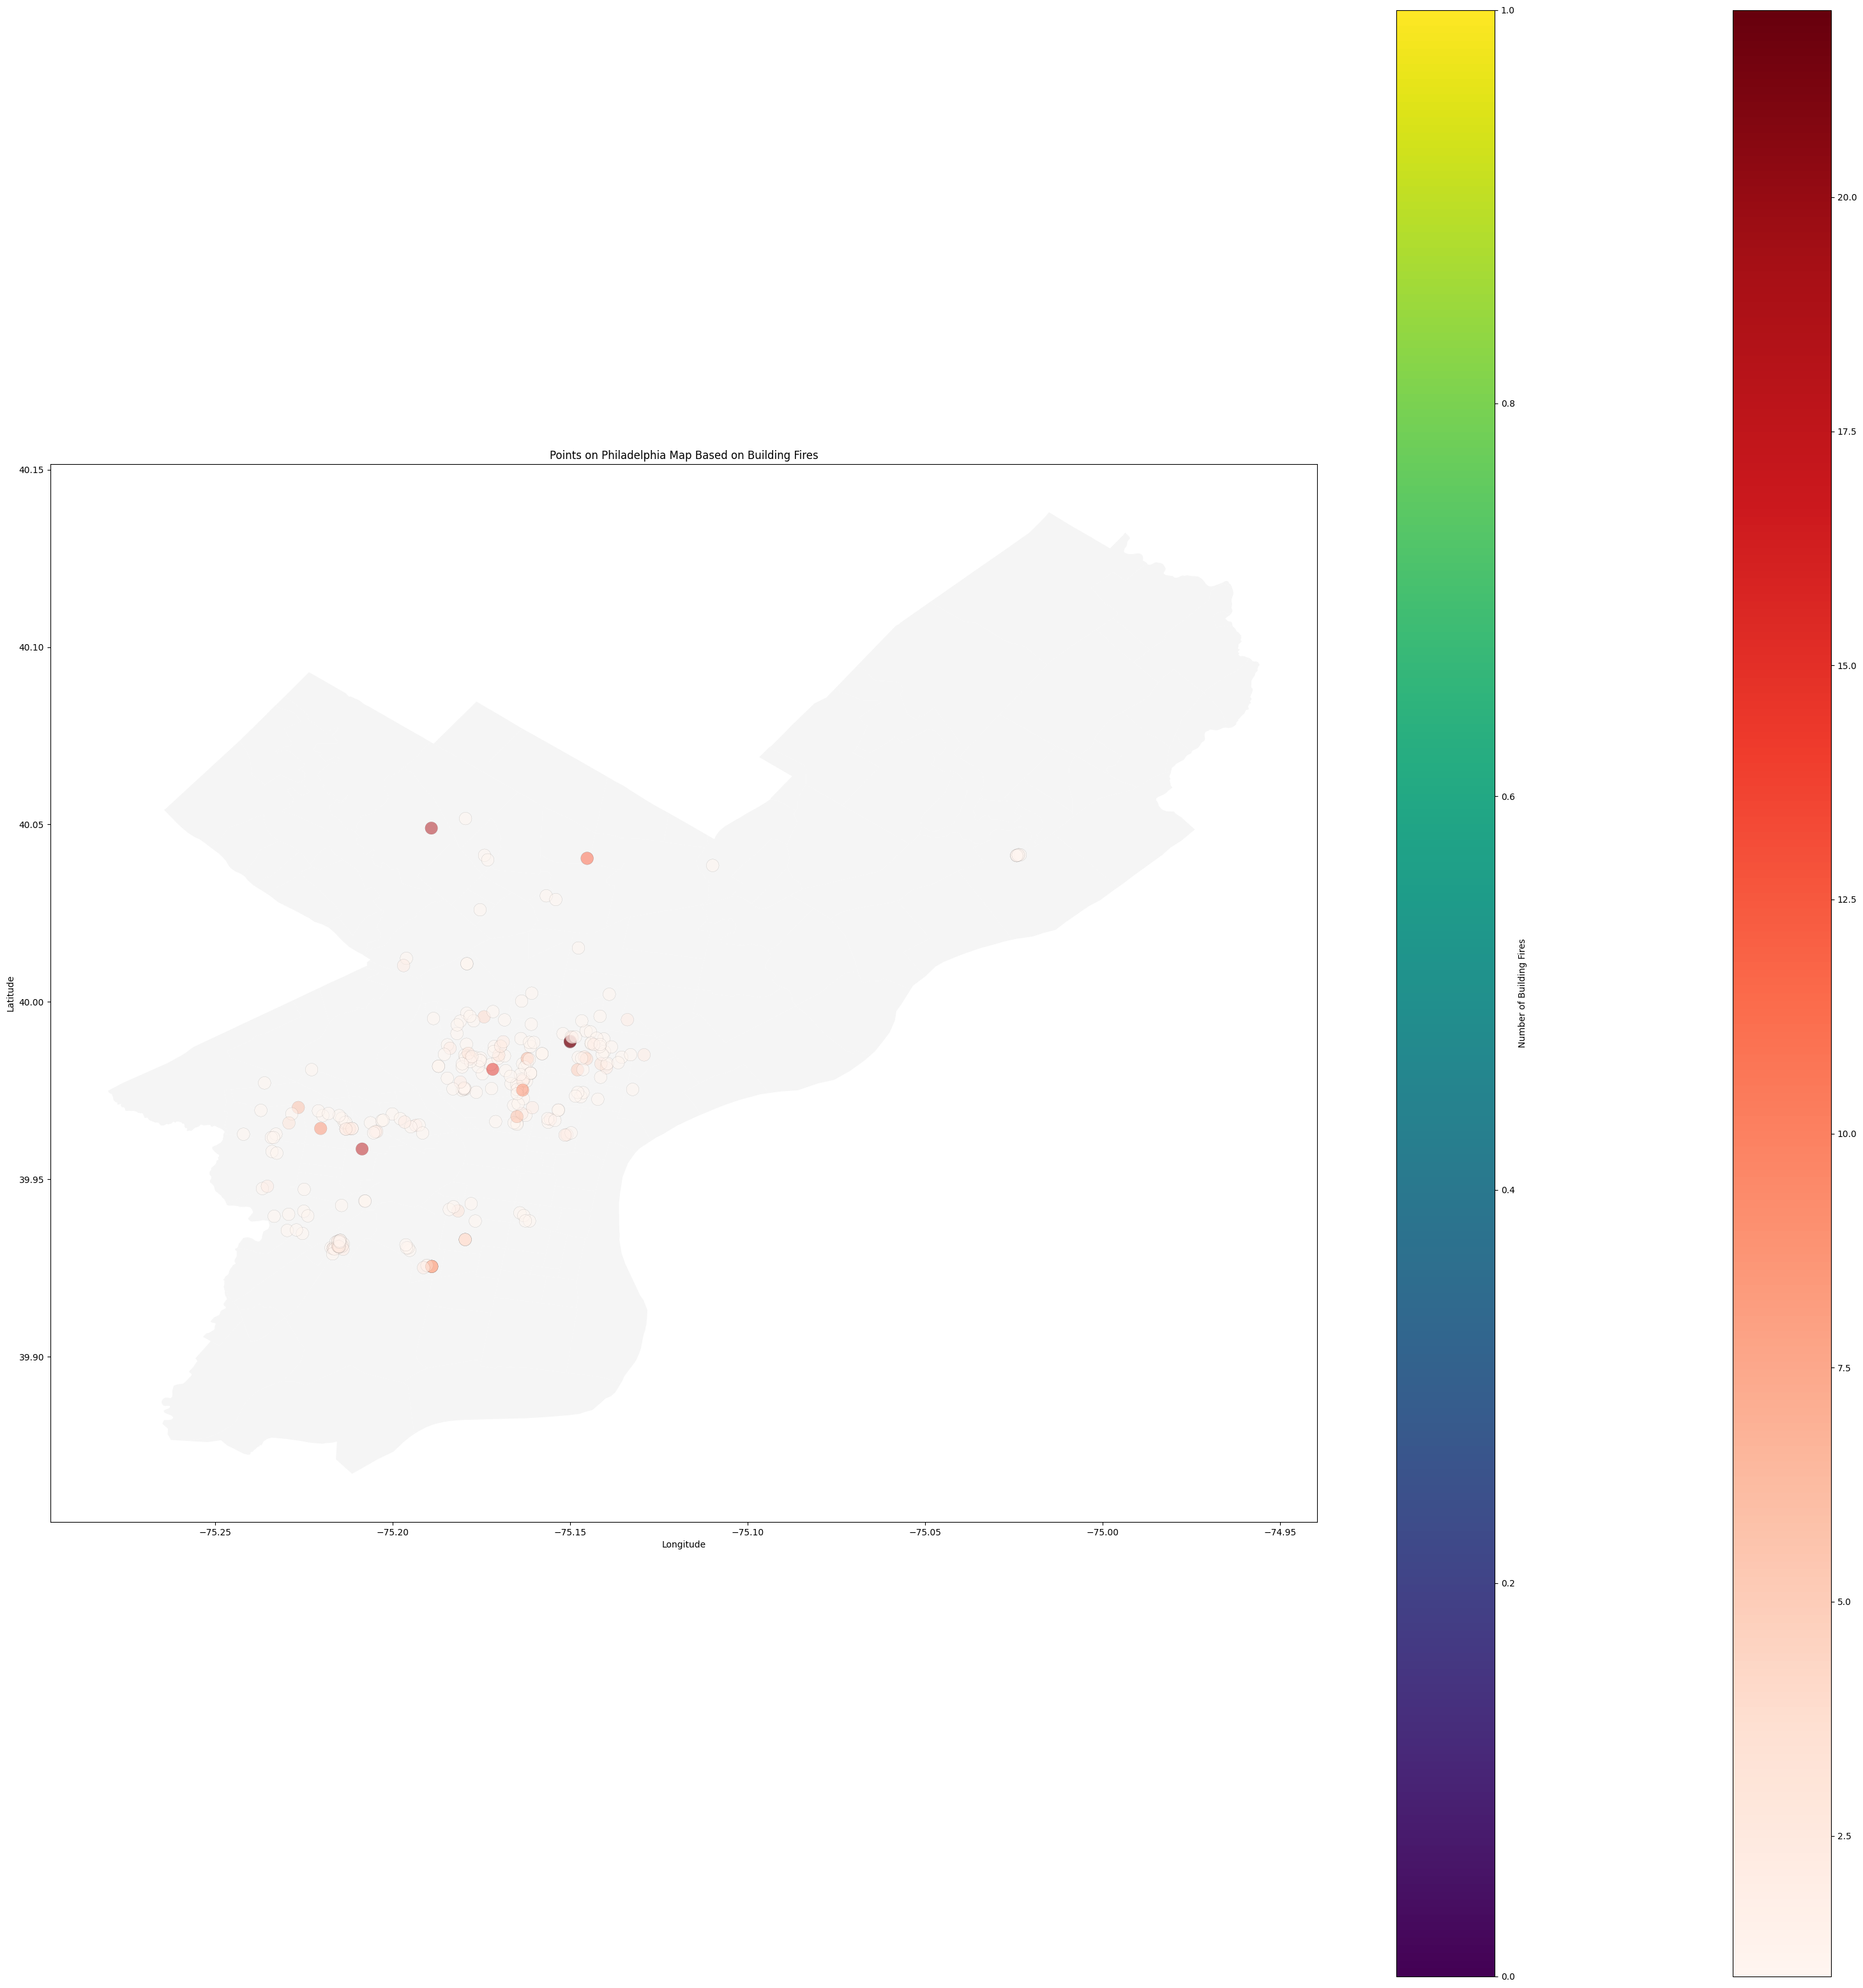

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Example DataFrame setup
data = {
    'latitude': list(ped.LAT.values),
    'longitude': list(ped.LON.values),
    'value': list(ped.building_fires.values)  # These are the values based on which the color varies
}

# Load the city map from GeoJSON
city_map = gpd.read_file('philadelphia.geojson')

# Create DataFrame and convert to GeoDataFrame
ddf = pd.DataFrame(data)
gdf = gpd.GeoDataFrame(ddf, geometry=gpd.points_from_xy(df.longitude, df.latitude))


# Plotting setup
fig, ax = plt.subplots(figsize=(40, 40))
city_map.plot(ax=ax, color='whitesmoke')  # use a lighter color for the city map to increase contrast

# Plot points with an edge color to make each point stand out
scatter = gdf.plot(ax=ax, column='value', cmap='Reds', edgecolor='black', linewidth=0.1, 
                   legend=True, alpha=0.5, markersize=200)

# Adding a color bar and labels
cbar = plt.colorbar(scatter.collections[0], ax=ax, orientation='vertical')
cbar.set_label('Number of Building Fires')
ax.set_title('Points on Philadelphia Map Based on Building Fires')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Optionally, set the aspect of the map to be equal. This might make the map look better.
ax.set_aspect('equal')

# Show the plot
plt.show()



In [135]:
p.sort_values('building_fires')

,objectid,corrected_address,corrected_unit,std_city,std_st,std_zip5,total_dwelling_units,acc_units,total_occupied,regular_vacant,total_units,pct_occupied,number_reported,pct_reported,months_since_report,pct_movein,people_per_unit,people_total,rent_per_month,spending_per_month,spending_per_month_prev_yr,hh_income,person_income,pct_lt5k,pct_5k_lt10k,pct_10k_lt15k,pct_15k_lt20k,pct_ge20k,pct_wage_major,pct_welfare_major,pct_other_major,pct_median,pct_lt50_median,pct_lt30_median,pct_2adults,pct_1adult,pct_female_head,pct_female_head_child,pct_disabled_lt62,pct_disabled_ge62,pct_disabled_all,pct_lt24_head,pct_age25_50,pct_age51_61,pct_age62plus,pct_age85plus,pct_minority,pct_black,pct_native_american,pct_asian,pct_hispanic,months_waiting,months_from_movein,pct_utility_allow,ave_util_allow,pct_bed1,pct_bed2,pct_bed3,pct_overhoused,tminority,tpoverty,tpct_ownsfd,chldrn_mbr_cnt,eldly_prcnt,pct_disabled_lt62_all,pct_lt80_median,median_inc_amnt,metro,micro,c1pprb,annl_expns_amnt,annl_expns_amnt_prev_yr,pha_total_units,dev_spending_per_month_prev_yr,dev_chldrn_mbr_cnt,dev_annl_expns_amnt,dev_annl_expns_amnt_prev_yr,dev_eldly_prcnt,dev_pct_disabled_lt62_all,dev_pct_lt80_median,dev_median_inc_amnt,dev_total_units,dev_total_dwelling_units,dev_acc_units,dev_total_occupied,dev_regular_vacant,dev_pha_total_units,dev_pct_occupied,dev_number_reported,dev_pct_reported,dev_months_since_report,dev_pct_movein,dev_people_per_unit,dev_people_total,dev_rent_per_month,dev_spending_per_month,dev_hh_income,dev_person_income,dev_pct_lt5k,dev_pct_5k_lt10k,dev_pct_10k_lt15k,dev_pct_15k_lt20k,dev_pct_ge20k,dev_pct_wage_major,dev_pct_welfare_major,dev_pct_other_major,dev_pct_median,dev_pct_lt50_median,dev_pct_lt30_median,dev_pct_2adults,dev_pct_1adult,dev_pct_female_head,dev_pct_female_head_child,dev_pct_disabled_lt62,dev_pct_disabled_ge62,dev_pct_disabled_all,dev_pct_lt24_head,dev_pct_age25_50,dev_pct_age51_61,dev_pct_age62plus,dev_pct_age85plus,dev_pct_minority,dev_pct_black,dev_pct_native_american,dev_pct_asian,dev_pct_hispanic,dev_months_waiting,dev_months_from_movein,dev_pct_utility_allow,dev_ave_util_allow,dev_pct_bed1,dev_pct_bed2,dev_pct_bed3,dev_pct_overhoused,dev_tminority,dev_tpoverty,dev_tpct_ownsfd,pha_section8_units_cnt,pha_section8_occupied,pha_opfund_amnt,pha_opfund_amnt_prev_yr,pha_capfund_amnt,pha_capfund_amnt_prev_yr,pha_ross_amnt,pha_fss_amnt,pha_chldrn_mbr_cnt,pha_eldly_prcnt,pha_pct_disabled_lt62_all,pha_pct_lt80_median,pha_median_inc_amnt,pha_annl_expns_amnt,pha_annl_expns_amnt_prev_yr,construction_year,dofa_actual_year,encoded_development_code,encoded_participant_code,encoded_msa_nm,encoded_zip5,encoded_zip9,encoded_zip11,msgusps_100% overall probable correctness,msgusps_20% overall probable correctness,msgusps_30% overall probable correctness,msgusps_40% overall probable correctness,msgusps_50% overall probable correctness,msgusps_60% overall probable correctness,msgusps_70% overall probable correctness,msgusps_80% overall probable correctness,msgusps_90% overall probable correctness,msgusps_apartment missing or not found,msgusps_house # not found on this street,msgusps_insufficient or blank address,msgusps_multiple match,msgusps_street not found,"pha_ha_section_8_size_category_extra large (5,000+)","pha_ha_section_8_size_category_large (1,000-4,999)",pha_ha_section_8_size_category_medium high (300-999),pha_ha_section_8_size_category_medium low (100-299),pha_ha_section_8_size_category_small (50-99),pha_ha_section_8_size_category_very small (0-49),building_type_code_es,building_type_code_nds,building_type_code_rw,building_type_code_sd,building_type_code_sf,building_type_code_wu,addr_type_f,addr_type_g,addr_type_h,addr_type_missing_value,addr_type_p,addr_type_r,addr_type_s,building_status_type_code_ddaprd,building_status_type_code_dddrft,building_status_type_code_ddprop,building_status_type_code_inapcp,building_status_type_code_rmi,building_status_type_code_rmiprp,"pha_ha_combined_size_category_extra large (5,000+)","pha_ha_combined_size

In [137]:
pd.set_option('display.max_rows', None)


display(df.isna().sum().sort_values() / len(df))
pd.set_option('display.max_rows', 10)


objectid                                                0.000000
st_dam_xtr_2014                                         0.000000
st_dam_sig_2014                                         0.000000
st_dam_hvy_2014                                         0.000000
aes_pres_2014                                           0.000000
flame_sprd_2014                                         0.000000
det_alert_2014                                          0.000000
bldg_invol_2014                                         0.000000
hum_fac_7_2014                                          0.000000
hum_fac_6_2014                                          0.000000
hum_fac_5_2014                                          0.000000
hum_fac_4_2014                                          0.000000
hum_fac_3_2014                                          0.000000
hum_fac_2_2014                                          0.000000
hum_fac_1_2014                                          0.000000
st_dam_min_2014          

In [64]:
es = df[df.building_type_code_es == True].copy().reset_index(drop=True)

In [140]:
c = es.select_dtypes(include='number').corr().building_fires.dropna().sort_values()
pd.set_option('display.max_rows', 75)
c[75 :]

,objectid,std_zip5,total_dwelling_units,acc_units,total_occupied,regular_vacant,total_units,pct_occupied,number_reported,pct_reported,months_since_report,pct_movein,people_per_unit,people_total,rent_per_month,spending_per_month,spending_per_month_prev_yr,hh_income,person_income,pct_lt5k,pct_5k_lt10k,pct_10k_lt15k,pct_15k_lt20k,pct_ge20k,pct_wage_major,pct_welfare_major,pct_other_major,pct_median,pct_lt50_median,pct_lt30_median,pct_2adults,pct_1adult,pct_female_head,pct_female_head_child,pct_disabled_lt62,pct_disabled_ge62,pct_disabled_all,pct_lt24_head,pct_age25_50,pct_age51_61,pct_age62plus,pct_age85plus,pct_minority,pct_black,pct_native_american,pct_asian,pct_hispanic,months_waiting,months_from_movein,pct_utility_allow,ave_util_allow,pct_bed1,pct_bed2,pct_bed3,pct_overhoused,tminority,tpoverty,tpct_ownsfd,chldrn_mbr_cnt,eldly_prcnt,pct_disabled_lt62_all,pct_lt80_median,median_inc_amnt,metro,micro,c1pprb,annl_expns_amnt,annl_expns_amnt_prev_yr,pha_total_units,dev_spending_per_month_prev_yr,dev_chldrn_mbr_cnt,dev_annl_expns_amnt,dev_annl_expns_amnt_prev_yr,dev_eldly_prcnt,dev_pct_disabled_lt62_all,dev_pct_lt80_median,dev_median_inc_amnt,dev_total_units,dev_total_dwelling_units,dev_acc_units,dev_total_occupied,dev_regular_vacant,dev_pha_total_units,dev_pct_occupied,dev_number_reported,dev_pct_reported,dev_months_since_report,dev_pct_movein,dev_people_per_unit,dev_people_total,dev_rent_per_month,dev_spending_per_month,dev_hh_income,dev_person_income,dev_pct_lt5k,dev_pct_5k_lt10k,dev_pct_10k_lt15k,dev_pct_15k_lt20k,dev_pct_ge20k,dev_pct_wage_major,dev_pct_welfare_major,dev_pct_other_major,dev_pct_median,dev_pct_lt50_median,dev_pct_lt30_median,dev_pct_2adults,dev_pct_1adult,dev_pct_female_head,dev_pct_female_head_child,dev_pct_disabled_lt62,dev_pct_disabled_ge62,dev_pct_disabled_all,dev_pct_lt24_head,dev_pct_age25_50,dev_pct_age51_61,dev_pct_age62plus,dev_pct_age85plus,dev_pct_minority,dev_pct_black,dev_pct_native_american,dev_pct_asian,dev_pct_hispanic,dev_months_waiting,dev_months_from_movein,dev_pct_utility_allow,dev_ave_util_allow,dev_pct_bed1,dev_pct_bed2,dev_pct_bed3,dev_pct_overhoused,dev_tminority,dev_tpoverty,dev_tpct_ownsfd,pha_section8_units_cnt,pha_section8_occupied,pha_opfund_amnt,pha_opfund_amnt_prev_yr,pha_capfund_amnt,pha_capfund_amnt_prev_yr,pha_ross_amnt,pha_fss_amnt,pha_chldrn_mbr_cnt,pha_eldly_prcnt,pha_pct_disabled_lt62_all,pha_pct_lt80_median,pha_median_inc_amnt,pha_annl_expns_amnt,pha_annl_expns_amnt_prev_yr,construction_year,dofa_actual_year,encoded_development_code,encoded_participant_code,encoded_msa_nm,encoded_zip5,encoded_zip9,encoded_zip11,encoded_city,prop_loss_2012,cont_loss_2012,oth_death_2012,oth_inj_2012,hum_fac_1_2012,hum_fac_2_2012,hum_fac_3_2012,hum_fac_4_2012,hum_fac_5_2012,hum_fac_6_2012,hum_fac_7_2012,bldg_invol_2012,det_alert_2012,flame_sprd_2012,aes_pres_2012,st_dam_hvy_2012,st_dam_sig_2012,st_dam_xtr_2012,st_dam_min_2012,exp_no_2012,inc_type_111_2012,inc_type_113_2012,inc_type_118_2012,building_fires_2012,prop_loss_2013,cont_loss_2013,oth_death_2013,oth_inj_2013,hum_fac_1_2013,hum_fac_2_2013,hum_fac_3_2013,hum_fac_4_2013,hum_fac_5_2013,hum_fac_6_2013,hum_fac_7_2013,bldg_invol_2013,det_alert_2013,flame_sprd_2013,aes_pres_2013,st_dam_hvy_2013,st_dam_sig_2013,st_dam_xtr_2013,st_dam_min_2013,exp_no_2013,inc_type_111_2013,inc_type_113_2013,inc_type_118_2013,building_fires_2013,prop_loss_2014,cont_loss_2014,oth_death_2014,oth_inj_2014,hum_fac_1_2014,hum_fac_2_2014,hum_fac_3_2014,hum_fac_4_2014,hum_fac_5_2014,hum_fac_6_2014,hum_fac_7_2014,bldg_invol_2014,det_alert_2014,flame_sprd_2014,aes_pres_2014,st_dam_hvy_2014,st_dam_sig_2014,st_dam_xtr_2014,st_dam_min_2014,exp_no_2014,inc_type_111_2014,inc_type_113_2014,inc_type_118_2014,building_fires_2014,prop_loss_2015,cont_loss_2015,oth_death_2015,oth_inj_2015,hum_fac_1_2015,hum_fac_2_2015,hum_fac_3_2015,hum_fac_4_2015,hum_fac_5_2015,hum_fac_6_2015,hum_fac_7_2015,bldg_invol_2015,det_alert_2015,flame_sprd_2015,aes_pres_2015,st_dam_hvy_2015,st_dam_sig_201

In [60]:
c[:10]

pct_female_head         -0.129524
pct_age25_50            -0.123233
pct_female_head_child   -0.112580
pct_1adult              -0.111501
pct_utility_allow       -0.100230
pct_lt5k                -0.094799
people_per_unit         -0.093067
pct_overhoused          -0.090750
pct_bed2                -0.088392
pct_wage_major          -0.083869
Name: building_fires, dtype: float64

<Axes: >

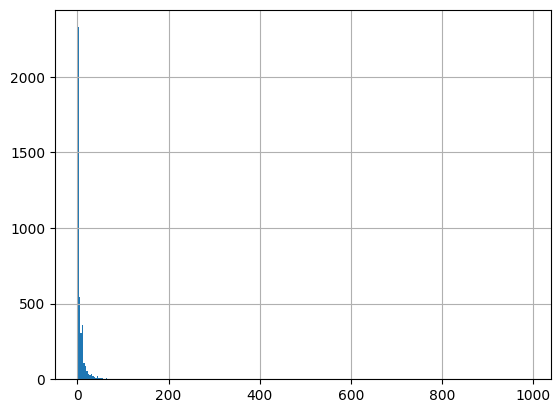

In [102]:
es.building_fires.hist(bins=300)

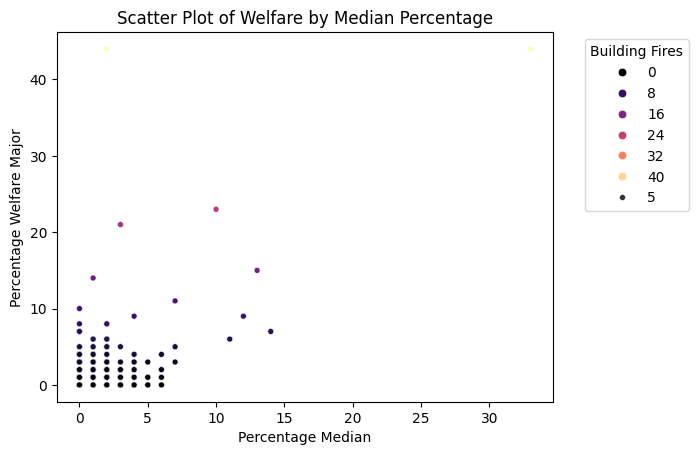

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'es' is your DataFrame
sns.scatterplot(data=es, x='building_fires_2020', y='building_fires_2021', hue='building_fires_2021',
                palette='magma',  # Change as needed for better color contrast
                size=5,             # Adjust size for better visibility
                edgecolor='w',      # White edge color to make points stand out
                alpha=1)          # Adjust alpha for better transparency control

plt.title('Scatter Plot of Welfare by Median Percentage')
plt.xlabel('Percentage Median')
plt.ylabel('Percentage Welfare Major')
plt.legend(title='Building Fires', bbox_to_anchor=(1.05, 1), loc=2)  # Move legend out of the plot

plt.show()
